# ENPH 213 - Week 6 Lab

In this lab, we will be working on interpolating between finite data sets using a variety of different methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab6, where LastName is your last name.  Submit that file to onQ.  Also, include your Lab4.py file (or similar) to ensure that the notebook can run without error.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 will be marked separately (Weighted out of 5).

## Part 1

Consider the data set consisting of the following $x$-values

0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9

and the corresponding $y$-values

0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929

Here in Part 1, you will interpolate the data using a polynomial.  Start by ensuring that you know what order of polynomial you should use.  Then, create the matrix that you need to diagonalize, and then call your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8


**Note: You will again need your BackSub(A,b) function from Lab 4.  Place the saved Lab4.py file in the same directory as this notebook, and use "from Lab4 import BackSub".  Submit the Lab4.py file with this notebook so that it can run when refreshed before marking.**

In [20]:
import numpy as np
from matplotlib import pyplot as plt

[0.390992] [0.11685006] [0.14257886] [0.29797783] [0.1549811] [-0.03256358] [0.2757724] [0.17655415]


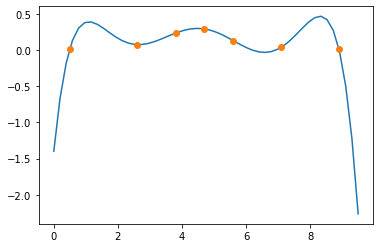

In [95]:
x = np.array([0.5,2.6,3.8,4.7,5.6,7.1,8.9])
y = np.array([0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.1304587, 0.03839685, 0.01497929])

A = np.zeros(49)
A = np.reshape(A, (7,7))
for i in range(7):
    for j in range(7):
        A[i,j] = x[i]**j
b = y.reshape((-1,1)) #have to reshape the y array to be vertical

c = np.linalg.solve(A, b) #solving the matrix of A and y/b

def p(x):
    v = 0 #initialize the value
    for i in range(7):
        v = v + c[i]*x**i
    return v

xr = np.linspace(0,9.5) #define the range of x
plt.plot(xr,p(xr)) #plot the xrange vs the function p out put for each x point
print(p(1.1),p(2.2),p(3.3),p(4.4),p(5.5),p(6.6),p(7.7),p(8.8))
plt.plot(x,y,'o')

# Part 2

Use the same (x,y) dataset from Part 1.

Here in Part 2, you will interpolate the data using Lagrange functions.  Start by ensuring that you know what order of polynomial you should use.  Then, create a function that can calculate the Lagrange function at a particular $x$ and $k$.  Use that function with appropriate coefficients in a sum to calculate the requested output.

For output, plot the interpolated function from 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

0.39099200315286226 0.11685006405266747 0.14257885929688532 0.2979778278098833 0.15498110064968534 -0.032563579832105775 0.27577240338584424 0.17655414958698307


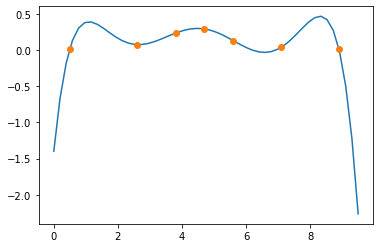

In [429]:
def L(x, xval,n,k):
    Ldenom = 1
    Lnumer = 1
    for j in range(0,n):
        if(j==k):
            continue
        Lnumer = Lnumer*(xval-x[j])
        Ldenom = Ldenom*(x[k]-x[j])
    L = Lnumer/Ldenom
    return L

def p2(x1):
    val = 0 
    for i in range (0,7): 
        val = val + y[i]*L(x,x1,7,i) 
    return val  

plt.plot(xr,p2(xr))
plt.plot(x,y,'o')
print(p2(1.1),p2(2.2),p2(3.3),p2(4.4),p2(5.5),p2(6.6),p2(7.7),p2(8.8))

# Part 3

Use the same (x,y) dataset from Part 1.

Here in Part 3, you will interpolate the data using the cubic Spline method.  Start by ensuring that you know what size of matrix you should use (this is particularly important for this method).  Then, poplulate the matrix with the tri-diagonal elements.  Once completed, use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Use the coefficients to calculate the interpolated function in the different regions.

As above, plot the interpolated function from 0 to 9.5, along with the points from the data set. Ensure that all output is consistent with the method.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

0.01589718058118945 0.043694547168286565 0.16200077384549902 0.2967581279823657 0.14924412029988132 0.04414267454189901 0.032560132201807264 0.016574724249004812


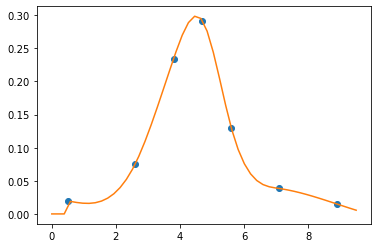

In [461]:
def bk(y,x,k):
    bk = 6*(((y[k+1]-y[k])/(x[k+1]-x[k]))-((y[k]-y[k-1])/(x[k]-x[k-1])))
    return bk

x = np.array([0.5,2.6,3.8,4.7,5.6,7.1,8.9])
y = np.array([0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.1304587, 0.03839685, 0.01497929])

B = np.ones(len(x)-2)
for i in range(1,len(x)-1):
    B[i-1]=bk(y,x,i)
B = B.reshape((-1,1))

C = np.zeros((len(x)-2)**2)
C = np.reshape(C,(len(x)-2,len(x)-2))

for i in range(0,len(x)-3):
    C[i,i] = 2*(x[i+2]-x[i])
    C[(i+1),i] = x[i+2]-x[i+1]
    C[i,(i+1)] = x[i+2]-x[i+1]
C[4,4] = 2*(x[i+3]-x[i+1])  #defining the matrix, had to add last one in manually 


c = np.linalg.solve(C,B)
c = np.append(c,0)
c = np.append(0,c)

def s_ks (xval,k,c):
    term1 = y[k-1]*(x[k]-xval)/(x[k]-x[k-1])+y[k]*(xval-x[k-1])/(x[k]-x[k-1])
    term2 = (c[k-1]/6)*((x[k]-xval)*(x[k]-x[k-1])-((x[k]-xval)**3)/(x[k]-x[k-1]))
    term3 = (c[k]/6)*((xval-x[k-1])*(x[k]-x[k-1])-((xval-x[k-1])**3)/(x[k]-x[k-1]))
    return term1 - term2 - term3 

def p3 (xval):
    for i in range(len(x)-1):
        if(x[i]<xval):
            if(x[i+1] > xval):
                break
    func = s_ks(xval,i+1,c) 
    return func
p3xr = np.zeros(len(xr))

for i in range(3,len(xr)): #had to cut off the first 3 values in xr because it was messing with the plot
    p3xr[i] = p3(xr[i])
plt.plot(x,y,'o')
plt.plot(xr,p3xr)
print(p3(1.1),p3(2.2),p3(3.3),p3(4.4),p3(5.5),p3(6.6),p3(7.7),p3(8.8))

# Part 4

Use the same (x,y) dataset from Part 1.

Here in Part 4, you will interpolate the data using a Fourier series / trigonometric functions.  Start by ensuring that you know what size of matrix you should use and the anticipated harmonics.  As well, you must estimate a periodicity for the data points so that you can specify a reasonable wavelength and wavenumber k to include in the functions.  Then, poplulate the matrix with the appropriate values from the trigonometric relations.  Once completed, call use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Once determined, the interpolated function can be calculated by the sum of the finite Fourier series.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

**QUESTION: Describe how you chose your value for the wavelength / wavenumber.**

0.3739991254273563
[[-5.77179932]
 [-0.85874942]
 [ 5.0333759 ]
 [ 2.73445356]
 [ 0.97929488]
 [ 0.44327327]
 [-0.87398141]]
[0.01963664]
[0.23905201] [0.10045513] [0.14374743] [0.29841449] [0.15428912] [-0.01761352] [0.19334121] [0.09452508]


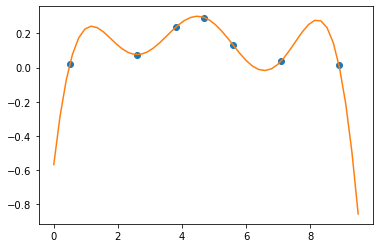

In [428]:
wl = 16.8 
k = 2*np.pi/wl
print(k)
D = np.zeros(len(x)**2)
D = np.reshape(D,(len(x),len(x)))

for i in range(len(x)):           
    D[i,0] = 0.5
    D[i,1] = np.cos(k*x[i])
    D[i,2] = np.sin(k*x[i])
    D[i,3] = np.cos(2*k*x[i])
    D[i,4] = np.sin(2*k*x[i])
    D[i,5] = np.cos(3*k*x[i])
    D[i,6] = np.sin(3*k*x[i])#defining the matrix across

a = np.linalg.solve(D,b)   #throwback to part one taking b
print(a)
def p4(xval):
    yval = a[0]/2
    i = 1
    m = 1
    while(i < len(x)):
        yval = yval + a[i]*np.cos(m*k*xval)+a[i+1]*np.sin(m*k*xval)
        i = i + 2
        m += 1
    return yval  
p4xr = np.zeros(len(xr))
for i in range(len(xr)):
    p4xr[i] = p4(xr[i])
    
print(p4(0.5))
print(p4(1.1),p4(2.2),p4(3.3),p4(4.4),p4(5.5),p4(6.6), p4(7.7), p4(8.8))
plt.plot(x,y,'o')
plt.plot(xr,p4xr)
plt.show()

# Part 5

None of the interpolation methods was particularly perfect, which is surprising as the function is a fairly simple, symmetric one -- a Lorentzian

$\large Lorentzian(x) = \frac{1}{\pi} \frac{\Gamma}{(x-x_0)^2 + \Gamma^2}$

The actual, calculated values for the $x$-values

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

are

0.02677123, 0.05450512, 0.14403162, 0.31830989, 0.14403162, 0.05450512, 0.02677123, 0.01563408


Discuss in a short paragraph which interpolation method you find to be the best choice for this Lorentzian function.  You may consider all aspects of the process such as error, usability, time to code, time to run, etc, and not simply the graphical output.  Some calculations to support your answer would also be reasonable.

The lorentzian function itself is not sinusoidal in nature, meaning the fourier series is not particularly useful for an accurate result. In fact, the method that produced a graph closest to a lorentzian was the Cubic Spline Interpolation. 

In [465]:
yreal = np.array([0.02677123,0.05450512,0.14403162,0.31830989, 0.05450512, 0.2677123, 0.01563408])
p1y = np.zeros(len(yreal))
p2y = np.zeros(len(yreal))
p3y = np.zeros(len(yreal))
p4y = np.zeros(len(yreal))
for i in range (0, len(yreal)):
    p1y[i] = p((i+1)*1.1)
    p2y[i] = p2((i+1)*1.1)
    p3y[i] = p3((i+1)*1.1)
    p4y[i] = p4((i+1)*1.1)

p1er = abs(p1y/yreal*100)
p1ertot = np.sum(p1er)/len(p1er)
print("\nPolynomial Error")
print(p1ertot)
p2er = abs(p2y/yreal*100)
p2ertot = np.sum(p2er)/len(p2er)
print("\nLagrange Error")
print(p2ertot)
p3er = abs(p3y/yreal*100)
p3ertot = np.sum(p3er)/len(p3er)
print("\nCubic Spline Error")
print(p3ertot)
p4er = abs(p4y/yreal*100)
p4ertot = np.sum(p4er)/len(p4er)
print("\nFourier Series Error")
print(p4ertot)

print("\n")
print("\nPolynomial Runtime")
%time p(1.1)
print("\nLagrange Runtime")
%time p2(1.1)
print("\nCubic Spline Runtime")
%time p3(1.1)
print("\nFourier Series Runtime")
%time p4(1.1)


Polynomial Error
361355.4075411516

Lagrange Error
561.1292852445924

Cubic Spline Error
120.54600788028436

Fourier Series Error
399.58816779651846



Polynomial Runtime
CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 17.9 µs

Lagrange Runtime
CPU times: user 52 µs, sys: 1e+03 ns, total: 53 µs
Wall time: 55.1 µs

Cubic Spline Runtime
CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.7 µs

Fourier Series Runtime
CPU times: user 72 µs, sys: 0 ns, total: 72 µs
Wall time: 76.1 µs


array([0.23905201])

As seen above, the cubic spline function also resulted in the least error of only 120 percent. This shows that the cubic spline function is the best function to use to fit to the lorentzian function. The functions runtimes were relatively small and similar, but the polynomial function has a a slightly faster runtime. The cubic spline function has the second fastest with 23 microseconds. The cubic spline function was the most difficult to code but its usability is very simple, as are all the other functions because they run the same way (one variable input). 

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.